# Regressão Linear

## Predizendo o Salário das pessoas - Salary Dataset 💸👷

Inicialmente, vamos trabalhar com um dataset simples, que conta com apenas 3 features, onde uma delas será a feature que queremos predizer.

O objetivo inicial é dar uma prática com regressão linear simples, de apenas 1 variável. No próximo tópico, trataremos regressão múltipla.

Inicialmente, faremos uma predição usando 1 feature preditora e a feature predita, e posteriormente, iremos alterar a feature preditora.

Por fim, iremos comparar a qualidade dos modelos e concluir algo sobre as features.

## Imports

In [20]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

## Baixando e tratando os dados

Aqui, baixamos os dados e convertemos em dataframe.

Então, tratamos o dado rapidamente, removendo todas as linhas que tem algum NaN.

In [21]:
df_salary = pd.read_csv("https://github.com/flaviovdf/icd-bradesco/raw/refs/heads/main/labs/lab03/data/Salary_Data%5B1%5D.csv").dropna()
df_salary.isna().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


In [22]:
df_salary

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


Agora, vamos separar nossos dados, e vamos nos olhar apenas para o atributo 'Age' e o atributo 'Years of Experience'.

Além disso, vamos usar a biblioteca do scikit para separar esses dados em conjuntos de Treino e Teste.

Questão 1.1:

Crie uma variável X, que recebe as colunas 'Age' e 'Years of Experience' e uma coluna y que recebe 'Salary'.

In [23]:
X = df_salary[['Age', 'Years of Experience']]
y = df_salary['Salary']

Agora, vamos dividir em treino e teste nossos dados, usando a biblioteca scikit.

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, \
                                                    random_state=32)

In [25]:
print(f"Tamanho do conjunto de treino: {len(X_train)}")
print(f"Tamanho do conjunto de teste: {len(X_test)}")

Tamanho do conjunto de treino: 5358
Tamanho do conjunto de teste: 1340


A partir desse momento, toda a regressão será feita sob o conjunto de treino!

## Visualizando os dados.

Antes de começar a regressão propriamente, vamos olhar um pouco para os dados. 👀

Particularmente para os casos em que buscamos uma relação linear, os scatterplots são muito úteis.

Questão 1.2:

Faça 2 gráficos, onde:
- O primeiro contém um scatterplot com o eixo X sendo a idade e o Y sendo o salário.
- O segundo contém um scatterplot com o eixo X sendo os anos de experiência e o Y sendo o salário.

Text(0.5, 1.0, 'Relação Idade x Salário')

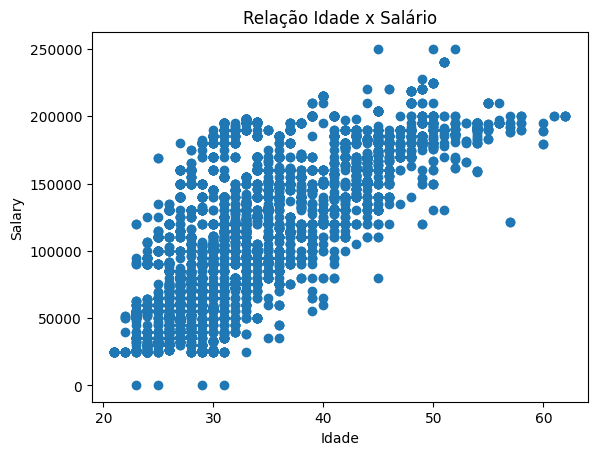

In [26]:
# Use essa célula para responder
plt.scatter(df_salary['Age'], df_salary['Salary'])
plt.xlabel('Idade')
plt.ylabel('Salary')
plt.title('Relação Idade x Salário')

Text(0.5, 1.0, 'Relação Experiência x Salário')

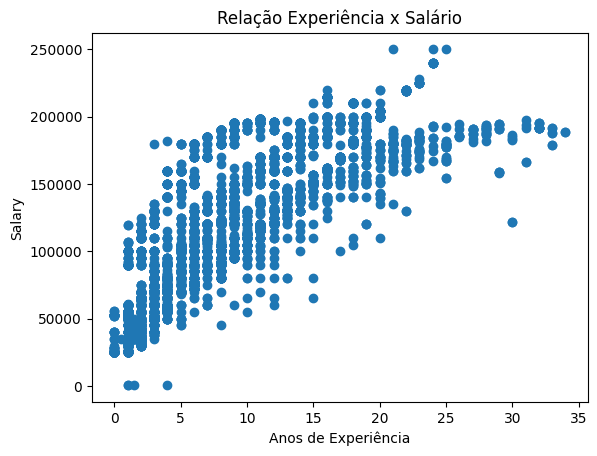

In [27]:
plt.scatter(df_salary['Years of Experience'], df_salary['Salary'])
plt.xlabel('Anos de Experiência')
plt.ylabel('Salary')
plt.title('Relação Experiência x Salário')

## Realizando a regressão

Agora que você examinou visualmente como seus dados se comportam, você já deve ter suas próprias conclusões do que espera de uma regressão linear.

Então, vamos colocá-las em prática.

Para realizar as regressões, vamos utilizar a biblioteca statsmodels.

## Questão 1.3

O primeiro passo, antes de começar a realizar predições, é que vamos separar as nossas variáveis `Anos de Experiência` e `Idade` em dois conjuntos X_train's diferentes. Seu objetivo nessa questão realizar essa separação.

Além disso, vamos fazer algo a mais.

Lembre-se que estamos realizando regressões lineares. Isso implica que nosso modelo de previsão ŷ é do tipo $ŷ = w_1x + w_0$. Para realizar uma regressão que faça a previsão de $w_0$, adicionamos uma coluna no DataFrame que contém apenas 1's.

Dica 👣: A função `sm.add_constant(meu_X)` pode ser útil.

In [28]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

X_train_idade = sm.add_constant(X_train['Age'])

X_train_experiencia = sm.add_constant(X_train['Years of Experience'])

## Primeira regressão

Agora, vamos realizar as predições e interpretar nossos resultados.

Vamos, nessa primeira célula, focar em realizar a previsão do salário da pessoa com base na sua Idade, isto é, vamos utilizar X_train_idade como feature.

Para isso, nós iremos criar um objeto que será nosso modelo.

In [29]:
model_idade = sm.OLS(y_train, X_train_idade)

Após criado o modelo, utilizamos uma função disponível no próprio modelo, chamada `.fit()`. Você verá essa função várias vezes conforme trabalha com modelos de aprendizado de máquina, pois ela é basicamente uma "convenção geral" da nomenclatura para a função que realiza o "treino" e produz os pesos $w_1$ e $w_0$ do modelo.

In [30]:
res = model_idade.fit()

Por fim, obtemos um relatório geral sobre o modelo.

Isso é uma das razões de utilizarmos o statsmodel!🙂

Ele é super bacana e produz esse relatório, que fornece várias estatísticas interessantes para você, economizando bastante nosso tempo⏰

In [31]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     5914.
Date:                Tue, 07 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:32:26   Log-Likelihood:                -63876.
No. Observations:                5358   AIC:                         1.278e+05
Df Residuals:                    5356   BIC:                         1.278e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -5.37e+04   2253.205    -23.831      0.0

## Questão 1.4

Agora, vamos fazer o mesmo scatterplot que fizemos para a idade e o salário, só que dessa vez, vamos adicionar ao plot nossas previsões. 🔮

Dica 👣: Na célula abaixo, deixamos pronto um `np.array` de pesos. Você pode utilizar `meus_dados_X.dot(pesos)` para realizar a multiplicação de matrizes e obter um vetor final resposta ŷ.

Text(0, 0.5, 'predição')

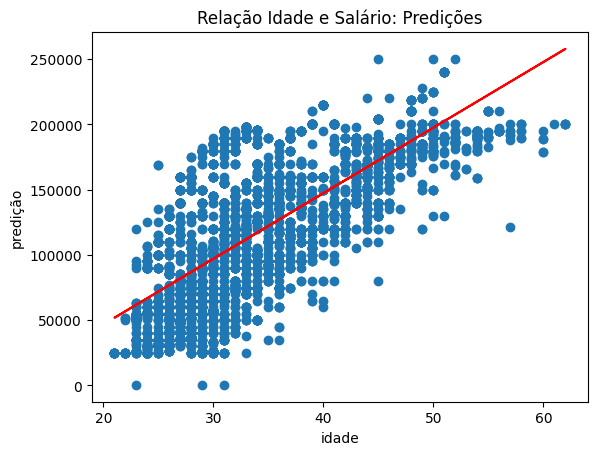

In [32]:
pesos = np.array([-5.37e+04, 5026.1480])
y_chapeu_idade = X_train_idade.dot(pesos) #predicao aqui

# plot aqui
plt.scatter(X_train['Age'], y_train)
plt.plot(X_train['Age'], y_chapeu_idade, color='red')
plt.title('Relação Idade e Salário: Predições')
plt.xlabel('idade')
plt.ylabel('predição')

## Analisando os resultados

Inicialmente, se você tiver feito tudo corretamente e voltar para olhar o seu sumário da regressão linear, você deve reparar que os pesos parecem grandes.

E de fato, eles devem ser grandes, porque as features geralmente tem grandezas específicas!

Durante o aprendizado desses pesos, o algoritmo que geralmente é utilizado envolve as derivadas parciais em relação a cada um desses pesos, para caminhar sob uma superfície de perda (Não se preocupe muito com a matemática por trás). 🤓

Mas basicamente, existem consequências de realizar essa "caminhada" quando você tem várias dimensões (ou seja, você tem várias features no seu conjunto X e gostaria de descobrir os pesos corretos para todas elas), porém essas features estão em diferentes escalas, fazendo com que seus "passos" fiquem *estranhos*. 🦹

Para resolver esse problema, usamos um conceito chamado Z-normalização. Basicamente, para cada feature do nosso conjunto de dados, simplesmente subtraímos sua média e dividimos pelo desvio padrão!

In [33]:
X_train_idade_norm = (X_train_idade['Age'] - X_train_idade['Age'].mean())/X_train_idade['Age'].std()
X_train_idade_norm = sm.add_constant(X_train_idade_norm)

y_train_norm = (y_train - y_train.mean())/y_train.std()

<Axes: xlabel='Age', ylabel='Salary'>

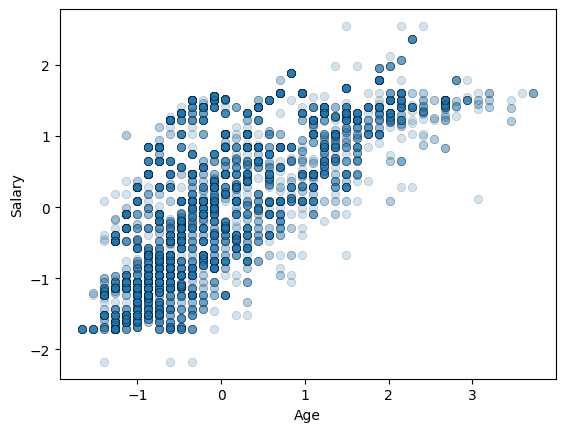

In [34]:
sns.scatterplot(x = X_train_idade_norm['Age'], y=y_train_norm, edgecolor="k", alpha=0.2)

Repare que o gráfico é exatamente o mesmo. Essa é a mágica da Z-normalização.

Agora, vamos repetir todas as etapas rapidamente.

In [35]:
model_idade_norm = sm.OLS(y_train_norm, X_train_idade_norm)
res = model_idade_norm.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     5914.
Date:                Tue, 07 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:32:27   Log-Likelihood:                -5609.2
No. Observations:                5358   AIC:                         1.122e+04
Df Residuals:                    5356   BIC:                         1.124e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -7.73e-17      0.009  -8.21e-15      1.0

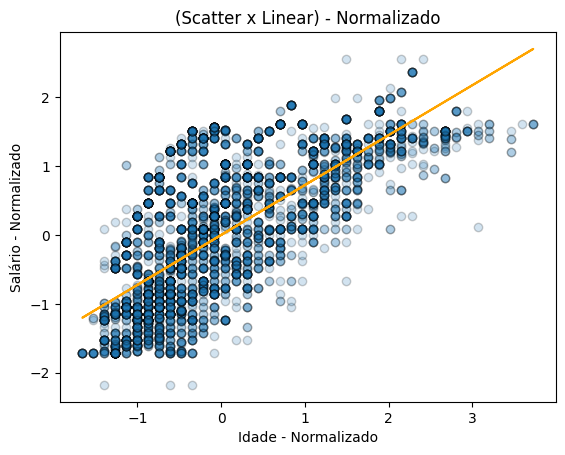

In [36]:
pesos_norm = np.array([-7.73e-17, 0.7244])
y_chapeu_norm = X_train_idade_norm.dot(pesos_norm)
plt.scatter(x = X_train_idade_norm['Age'], y = y_train_norm, edgecolor='k', alpha=0.2)
plt.plot(X_train_idade_norm['Age'], y_chapeu_norm, color='orange')
plt.xlabel("Idade - Normalizado")
plt.ylabel("Salário - Normalizado")
plt.title("(Scatter x Linear) - Normalizado")
plt.show()

Exatamente a mesma coisa! 🧙

Porém, nesse caso acima, você nunca vai ter problemas e *coisas estranhas* acontecendo com suas previsões e tudo fica muito mais bacana.

Além disso, as escalas são um pouco *esquisitas* e pouco interpretáveis. Anteriormente, você pode observar que um ano de idade deveria corresponder à um aumento de aproximadamente R$5.000 em média.

No exemplo acima, isso já não faz mais tanto sentido, bem como temos, até mesmo, idades negativas.

## Faça você mesmo

Nesse tópico, teremos uma série de questões, e nosso objetivo é repetir os experimentos anteriores, porém alterando a feature preditora. Agora, vamos usar, na realidade, os Anos de Experiência para predizer o salário.

## Questão 1.5

Utilize o conjunto X de treino que havíamos separado algumas células atrás, referente aos anos de experiência, e Z-normalize esse conjunto. Observe que o y_train_normalizado já está pronto.🙂

Via das dúvidas, verifique que o scatterplot ficou igual ao scatterplot inicial de anos de experiência por salário.

In [37]:
X_train_experiencia_normalizado = (X_train_experiencia['Years of Experience'] - X_train_experiencia['Years of Experience'].mean())/X_train_experiencia['Years of Experience'].std()
X_train_experiencia_normalizado = sm.add_constant(X_train_experiencia_normalizado)

## Questão 1.6

Agora, seu problema está pronto para ser modelado. Utilize novamente a biblioteca `sm` para criar seu modelo `sm.OLS`.

Realize também o `.fit()` e faça faça um `print()` do sumário.

In [38]:
# Responda aqui
model_exp_norm = sm.OLS(y_train_norm, X_train_experiencia_normalizado)
res = model_exp_norm.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                 1.014e+04
Date:                Tue, 07 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:32:27   Log-Likelihood:                -4756.8
No. Observations:                5358   AIC:                             9518.
Df Residuals:                    5356   BIC:                             9531.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -7.73e-17    

## Questão 1.7

Agora, vamos criar o mesmo vetor de pesos $W$ que haviamos criado anteriormente, fazer a multiplicação matricial do treino pelos pesos e obter nossa predição.

Com isso, repita o mesmo plot anterior com a reta.

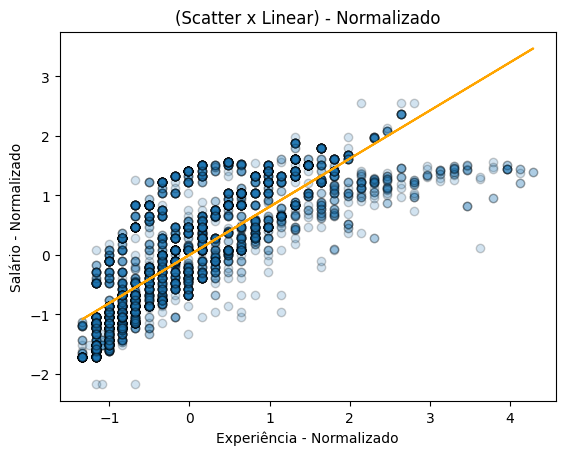

In [39]:
pesos = np.array([-7.73e-17, 0.8089]) #para facilitar suas vidas <3
y_pred = X_train_experiencia_normalizado.dot(pesos)

# plot aqui...
plt.scatter(x = X_train_experiencia_normalizado['Years of Experience'], y = y_train_norm, edgecolor='k', alpha=0.2)
plt.plot(X_train_experiencia_normalizado['Years of Experience'], y_pred, color='orange')
plt.xlabel("Experiência - Normalizado")
plt.ylabel("Salário - Normalizado")
plt.title("(Scatter x Linear) - Normalizado")
plt.show()

## Questão 1.8 - Teórica

Essa questão em particular, como algumas questões posteriores, não será uma resposta que necessite de código.

Observe os 2 sumários dos modelos que fizemos nesse notebook, e dê uma atenção especial para o $R^2$.

O que você pode concluir sobre as features usadas para a previsão (Idade e Anos de Experiência), após comparar os $R^2$ de ambos os modelos, um treinado com base na Idade e outro treinado com base nos Anos de Experiência? Qual você acha que te proporcionou um melhor modelo de previsão?

In [40]:
#R² do modelo de experiência : 0.654
#R² do modelo de idade : 0.525
#Podemos perceber que o modelo de experiência teve maior R², o que significa que foi um modelo com capacidade preditiva melhor.
#Dizemos que é um modelo mais significativo.

# Regressão Múltipla


## Predizendo a glicose do sangue - Diabetes Dataset 🩸🍬

Neste laboratório você deverá usa uma regressão linear para o problema de **predição da glicose do sangue**. Para isso, usaremos o dataset de diabetes de Stanford. Notem que as variáveis já estão normalizadas.

Você não precisa implementar os métodos, já que estão disponíveis na biblioteca [statsmodels](https://www.statsmodels.org/stable/index.html) da linguagem Python. Se necessário, pode fazer mais importações de bibliotecas.

### Imports

In [41]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

from sklearn.datasets import load_diabetes

Carregando os dados:

In [42]:
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data,columns =[diabetes.feature_names])

Você pode usar essa função abaixo, disponível juntamente com os dados, para ter uma visão geral dos dados, com uma breve descrição.

Isso sempre é um bom hábito, pois pode te ajudar a interpretar melhor seus dados e tomar melhores decisões.

Além disso, as colunas geralmente tem nomes *estranhos*, seja em abreviações, seja em códigos. Você sempre deve consultar novamente a descrição, pois ela tem uma descrição breve do que cada coluna representa. Isso é bom para lembrar exatamente o que significa cada uma das colunas.

**PS: Renomear as colunas talvez funcione, mas nem sempre é possível encontrar um nome que seja ao mesmo tempo enxuto e representativo semânticamente para um atributo, por isso a descrição é tão importante. ✍**

In [43]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

E abaixo, a nossa tabela de dados

In [44]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


Observando a descrição e nossos dados, observe que queremos predizer a coluna de nome *s6*, que representa a glicose no sangue. 🍬

In [45]:
# Variavel que queremos predizer
TARGET = "s6"

### Exercício 1

1. Execute a regressão em statsmodels para prever a variável 6. Use apenas as variáveis age, sex, bmi e bp como preditoras. Para isso, você precisa de:

- Definir variáveis *X* e *Y*.

`Y = ...` e `X = ...`

- Lembrar de adicionar a coluna de 1's, para a previsão da constante. Felizmente, já existe uma função para isso em statsmodel.

`X = sm.add_constant(X)`

- Usar a função `mod = sm.OLS(Y, X)`, para gerar um modelo.

- Otimizar o modelo, obtendo os coeficientes para cada coluna.

`res = mod.fit()`

- Por fim, você pode utilizar a função abaixo para obter um agregado de informações sobre o modelo.

`print(res.summary())`

2. Você não precisa responder essa pergunta por escrito, porém interprete os intervalos de confiança das variáveis. Existe alguma que poderia ser eliminada? Se sim, qual(is)?

In [46]:
# Resposta aqui
X = df[['age', 'sex','bmi','bp']]
y = df['s6']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, \
                                                    random_state=32)

X_train = sm.add_constant(X_train)

mod = sm.OLS(y_train, X_train)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     s6   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     30.61
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           7.68e-22
Time:                        00:32:27   Log-Likelihood:                 630.11
No. Observations:                 353   AIC:                            -1250.
Df Residuals:                     348   BIC:                            -1231.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.002      0.408      0.6

In [47]:
# Resposta aqui
X = df[['age', 'sex','bmi','bp']]
y = df['s6']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, \
                                                    random_state=32)


X_train_normalizado = (X_train - X_train.mean())/X_train.std()
X_train_normalizado = sm.add_constant(X_train)

y_train_norm = (y_train - y_train.mean())/y_train.std()


mod = sm.OLS(y_train, X_train)
res = mod.fit()
print(res.summary())


                                 OLS Regression Results                                
Dep. Variable:                     s6   R-squared (uncentered):                   0.260
Model:                            OLS   Adj. R-squared (uncentered):              0.252
Method:                 Least Squares   F-statistic:                              30.66
Date:                Tue, 07 Oct 2025   Prob (F-statistic):                    6.94e-22
Time:                        00:32:27   Log-Likelihood:                          630.03
No. Observations:                 353   AIC:                                     -1252.
Df Residuals:                     349   BIC:                                     -1237.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

**Conclusão**

Escreva sua conclusão.
R: "O modelo como um todo não teve bom desempenho explicando apenas 26% da variável alvo. Essas variaveis selecionadas não são tão boas para explicar essa variável alvo. Das variáveis selecionadas as que tiveram melhor desempenho foram bmi e bp, respectivamente."

### Exercício 2

Crie um novo dataframe filtrado, `filtered_df`, que contém apenas as colunas:
- age
- sex
- bmi
- bp
- s6 (Nossa variável a ser predita)

Use a função do seaborn, `sns.pairplot`, para obter vários scatterplots das variáveis, e foque na última dessa matriz de gráficos. Essa última linha representa todos os scatterplots onde Y é a variável que queremos predizer (nesse caso, a glicose *s6*) e X são todas as outras variáveis do DataFrame.

Tente observar se existe alguma correlação visível entre a variável resposta e as variáveis usadas na predição.

Após refletir por um momento, volte na questão anterior e faça uma comparação das variáveis que você achou razoável remover. Além disso, observe o $R^2$ do seu modelo linear, e reflita novamente sobre a visibilidade das correlações.

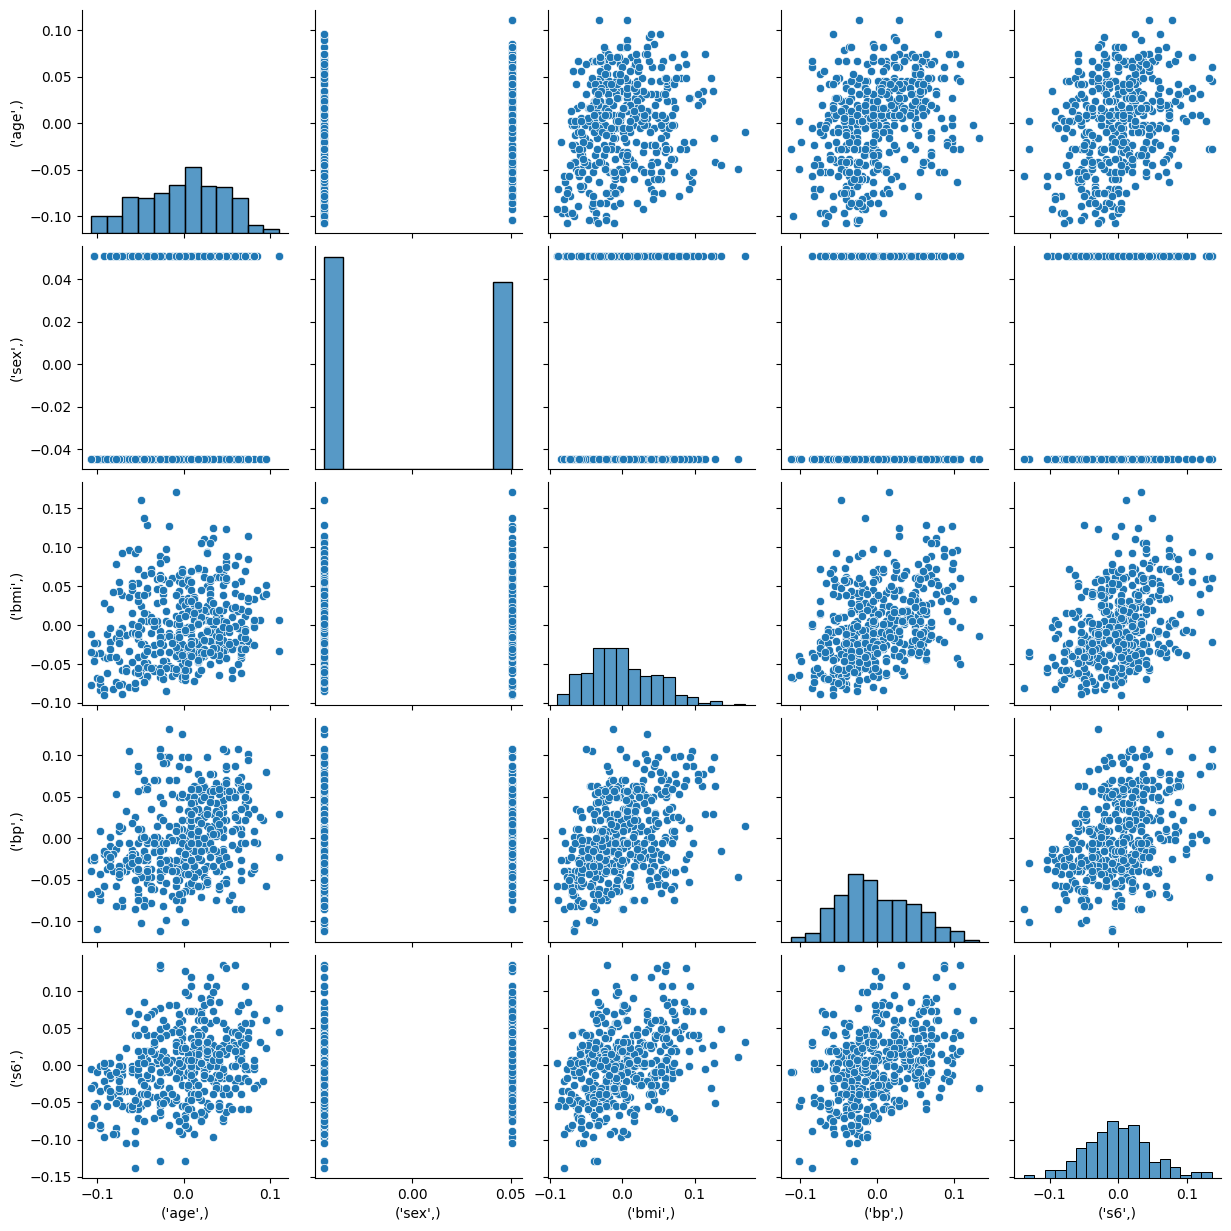

In [48]:
# Resposta aqui
filtered_df = df[['age', 'sex', 'bmi', 'bp', 's6']]
sns.pairplot(filtered_df)

**Conclusão**

Escreva sua conclusão.
R:"As variáveis bmi e bp são as que parecem ter maior correlação visível que as demais. A variável "sex" eu removeria, já a "age" se apresenta mais concentrada, eu retiraria também, mas fazendo testes para ver como se comporta.